## Praca domowa nr 5
Michał Piasecki

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [14]:
points = pd.read_csv('clustering.csv', names=['X','Y'])

In [15]:
points.head()

,X,Y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


Zobaczmy jak wyglądają nasze punkty na płaszczyźnie


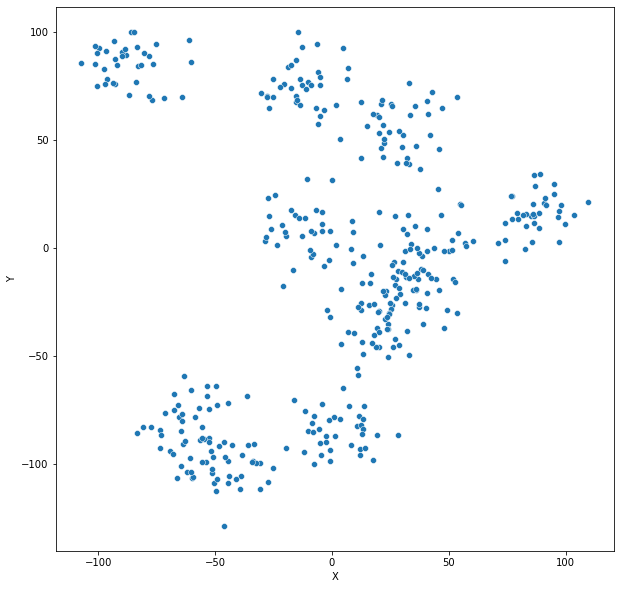

In [49]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = points, x = 'X', y ='Y')

Na pierwszy rzut oka wygląda to tak jakby 8 klastrów było optymalnych

(-0.5, 485.5, 327.5, -0.5)

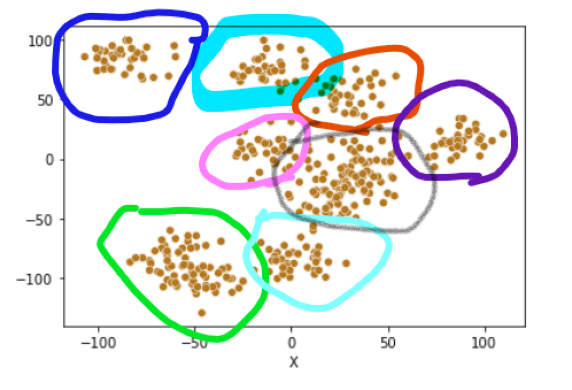

In [48]:
photo = cv2.imread('rysunek_autora.png')
plt.figure(figsize=(10,10))
plt.imshow(photo)
plt.axis('off')

Ja swoim okiem poklasterowałbym to tak. Zobaczmy jak zrobią to algorytmy :)

# Metoda k-średnich


In [53]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

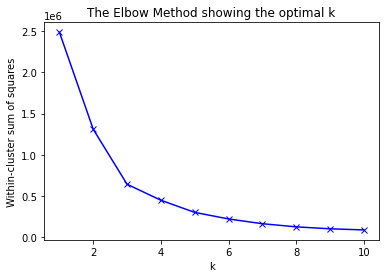

In [54]:
wcss_vec = count_wcss_scores(points, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

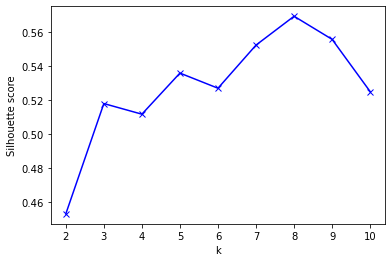

In [98]:
from sklearn.metrics import silhouette_score
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores
cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(points, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Hmmm , a więc metoda '"łokcia " wskazuje nam na 3 klastry, a sillhoute 8. Narysujemy oba, aczkolwiek ja się bardziej przychylam do sillhoute.

In [72]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X['X'], X['Y'], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title(f'K-means clusters for {n_clusters} clasters ')
    plt.show()

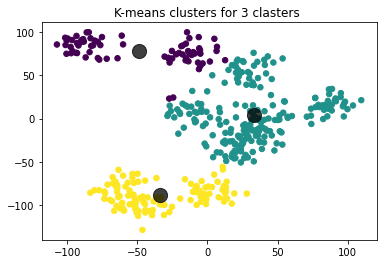

In [75]:
plot_kmeans_clusters(points,3)

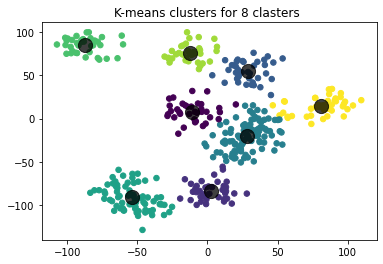

In [76]:
plot_kmeans_clusters(points, 8)

Moim zdaniem dla 8 klastrów wygląda to sensowniej, aczkolwiek zależy co byśmy chcieli osiągnąć.

# Metoda k-medoids
Metoda ta różni się od metody k-Means tym, że za środek klastrów wybierane są punkty ze zbioru. Zobaczmy czy nam to coś zmieni.

In [99]:
def plot_kmedoids_clusters(X, n_clusters):
    kmedoid = KMedoids(n_clusters=n_clusters, random_state=0)
    kmedoid.fit(X)
    y_kmedoid = kmedoid.predict(X)
    plt.scatter(X['X'], X['Y'], c=y_kmedoid, s=30, cmap='viridis')

    centers = kmedoid.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title(f'K-Medoids clusters for {n_clusters} clasters ')
    plt.show()

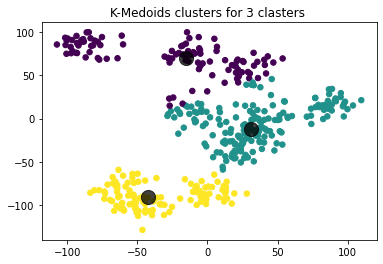

In [100]:
plot_kmedoids_clusters(points,3)

Okej, widzimy, że zbiór fioletowy "przywłaszczył" sobie trochę punktów należących wcześniej do zbioru miętowego.
Zobaczmy czy coś się zmieni dla 8 klastrów.

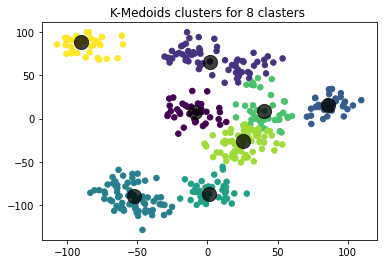

In [101]:
plot_kmedoids_clusters(points,8)

O, tutaj niefajne rzecz się porobiły, zupełnie nie wygląda to jak sensowna kklasteryzacja.

# Metoda aglomeracyjna

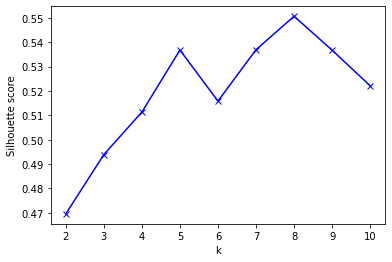

In [102]:
cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(points, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [94]:
from sklearn.cluster import AgglomerativeClustering

def show_aggolmerative(data, number_of_clusters):
    model = AgglomerativeClustering(n_clusters=number_of_clusters)
    y = model.fit_predict(data)
    plt.scatter(data['X'], data['Y'], c=y, s=30, cmap='viridis')
    plt.title(f"Agglomerative with {number_of_clusters} clasters")
    plt.show()
    

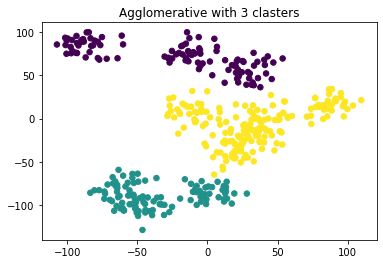

In [95]:
show_aggolmerative(points,3)

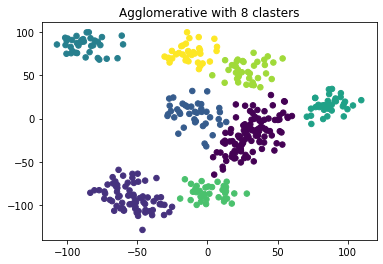

In [96]:
show_aggolmerative(points, 8)

# Wnioski:
Na tym zbiorze wydaje mi się, że metryka sillhoute sprawdza się lepiej niż metryka łokcia. Dodatkowo uważam, że metoda k-Medoids kiepsko sobie radzi. Nie do końca widzę sensowność jej zastosowania.